In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
%matplotlib inline

from binance.um_futures import UMFutures
from binance.spot import Spot
from binance.lib.utils import config_logging
from binance.error import ClientError

import requests
requests.packages.urllib3.util.ssl_.DEFAULT_CIPHERS += 'HIGH:!DH:!aNULL'
import logging
logging.getLogger().setLevel(logging.WARNING)
from time import sleep
import socket
socket.getaddrinfo('localhost', 8080)

import warnings
warnings.filterwarnings('ignore')

***
# **Data Anlaysis**

In [2]:
# Match the collected data info.
start_time=[2019, 9, 8, 23, 59, 59]
end_time=[2023, 7, 15, 23, 59, 59]
pool = ['BTC', 'ETH']
interval = "1m"
contract_type = 'PERPETUAL'

try:
    os.mkdir('figs')
except:
    pass

start_time = datetime(*start_time).strftime('%Y-%m-%d')
end_time = datetime(*end_time).strftime('%Y-%m-%d')

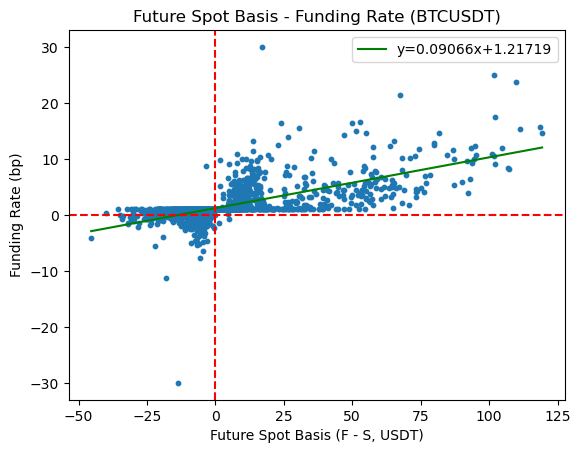

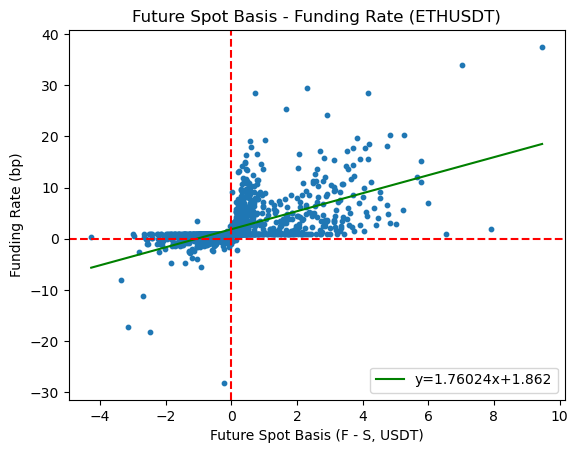

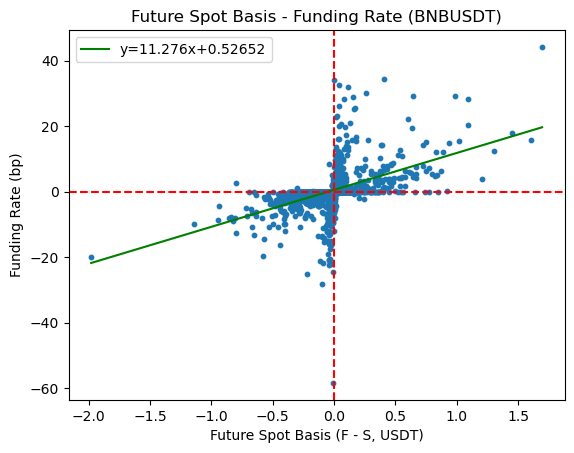

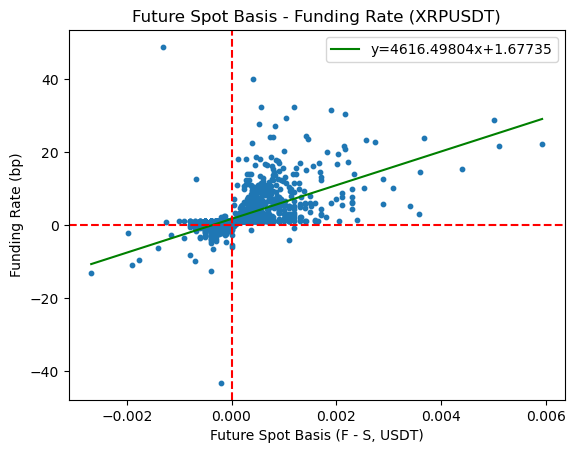

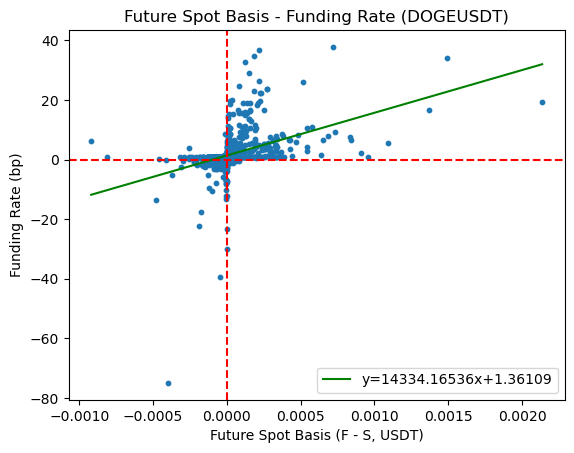

In [156]:
for sym in pool:
    symbol = sym+'USDT'

    completed = 0

    spot_df = pd.read_csv('data/'+symbol+'_spot_2019-09-08_2023-07-15_1m.csv')
    future_df = pd.read_csv('data/'+symbol+'_PERPETUAL_2019-09-08_2023-07-15_1m.csv')
    funding_df = pd.read_csv('data/'+symbol+'_funding rate_2019-09-08_2023-07-14.csv')

    spot_df['open time'] = pd.to_datetime(spot_df['open time'])
    future_df['open time'] = pd.to_datetime(future_df['open time'])
    funding_df['fundingTime'] = pd.to_datetime(funding_df['fundingTime'])

    merged_df = pd.merge(funding_df[['fundingRate', 'fundingTime']], spot_df[['close', 'open time']], left_on='fundingTime', right_on='open time', how='inner')
    merged_df = pd.merge(merged_df, future_df[['close', 'open time']], left_on='fundingTime', right_on='open time', how='inner')
    merged_df['basis'] = merged_df['close_y'] - merged_df['close_x']
    merged_df['fundingRate']*=10000

    plt.scatter(merged_df['basis'], merged_df['fundingRate'], s=10)
    a, b = np.polyfit(merged_df['basis'], merged_df['fundingRate'], 1)
    x = np.linspace(merged_df['basis'].min(), merged_df['basis'].max(), 100)
    plt.plot(x, a * x + b, color='green', label='y='+str(round(a,5))+'x+'+str(round(b,5)))
    plt.axhline(0, color='r', linestyle='--')
    plt.axvline(0, color='r', linestyle='--')
    plt.xlabel('Future Spot Basis (F - S, USDT)')
    plt.ylabel('Funding Rate (bp)')
    plt.title('Future Spot Basis - Funding Rate ('+symbol+')')
    plt.legend()
    plt.savefig('figs/Future Spot Basis - Funding Rate ('+symbol+')')
    plt.show()
    

In [244]:
rf

,DATE,TB3MS,close time
0,1934-01-01,0.72,1934-01-01
1,1934-02-01,0.62,1934-02-01
2,1934-03-01,0.24,1934-03-01
3,1934-04-01,0.15,1934-04-01
4,1934-05-01,0.16,1934-05-01
...,...,...,...
1069,2023-02-01,4.65,2023-02-01
1070,2023-03-01,4.69,2023-03-01
1071,2023-04-01,4.92,2023-04-01
1072,2023-05-01,5.14,2023-05-01


                     close time   close_x  close_y  volume
0       2021-02-03 08:20:59.999  35987.82  36030.9     NaN
1       2021-02-03 08:21:59.999  36041.64  36101.5     NaN
2       2021-02-03 08:22:59.999  36001.19  36068.0     NaN
3       2021-02-03 08:23:59.999  36040.34  35600.1     NaN
4       2021-02-03 08:24:59.999  36052.26  36089.3     NaN
...                         ...       ...      ...     ...
1305914 2023-07-30 05:34:59.999  29318.53  29698.6     0.0
1305915 2023-07-30 05:35:59.999  29318.53  29698.6     0.0
1305916 2023-07-30 05:36:59.999       NaN  29698.6     0.0
1305917 2023-07-30 05:37:59.999       NaN  29696.7     0.0
1305918 2023-07-30 05:38:59.999       NaN  29696.7     0.0

[1305919 rows x 4 columns]
73427     2021-03-26 08:07:59.999
204654    2021-06-25 11:14:59.999
335506    2021-09-24 08:06:59.999
476623    2021-12-31 08:03:59.999
597583    2022-03-25 08:03:59.999
728623    2022-06-24 08:03:59.999
869743    2022-09-30 08:03:59.999
1000783   2022-12-30 08:03

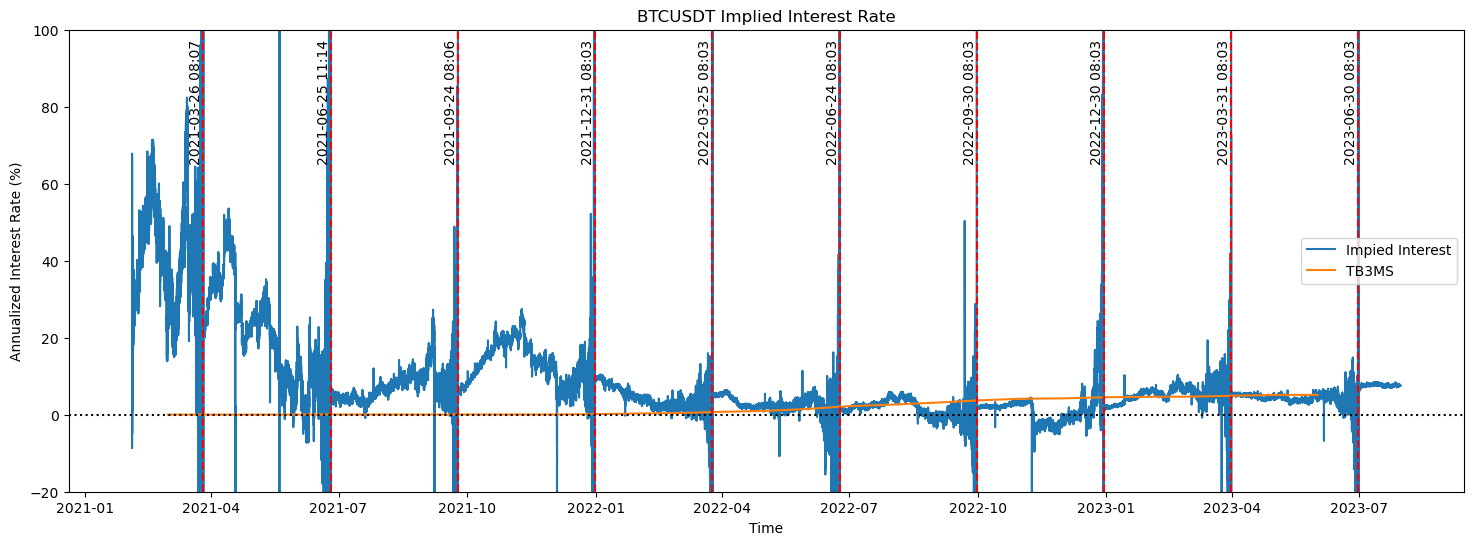

                     close time  close_x  close_y  volume
0       2021-02-04 07:00:59.999  1678.70  1679.71     NaN
1       2021-02-04 07:01:59.999  1678.06  1664.00     NaN
2       2021-02-04 07:02:59.999  1673.94  1675.00     NaN
3       2021-02-04 07:03:59.999  1673.30  1632.82     NaN
4       2021-02-04 07:04:59.999  1673.30  1629.71     NaN
...                         ...      ...      ...     ...
1305115 2023-07-30 14:55:59.999      NaN  1893.80     0.0
1305116 2023-07-30 14:56:59.999      NaN  1893.78     0.0
1305117 2023-07-30 14:57:59.999      NaN  1894.06     0.0
1305118 2023-07-30 14:58:59.999      NaN  1894.59     0.0
1305119 2023-07-30 14:59:59.999      NaN  1894.18     0.0

[1305120 rows x 4 columns]
72067     2021-03-26 08:07:59.999
203295    2021-06-25 11:15:59.999
334146    2021-09-24 08:06:59.999
475263    2021-12-31 08:03:59.999
596223    2022-03-25 08:03:59.999
727263    2022-06-24 08:03:59.999
868383    2022-09-30 08:03:59.999
999423    2022-12-30 08:03:59.999
1130

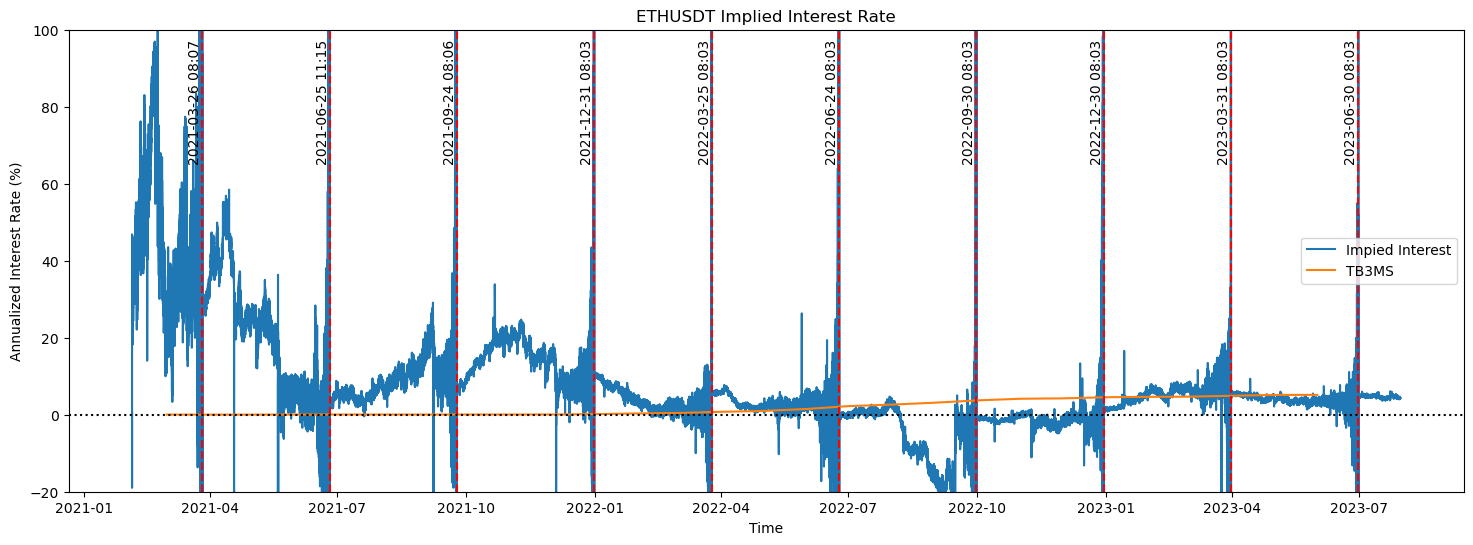

In [3]:
try:
    os.mkdir('figs\Implied Interest')
except:
    pass

rf = pd.read_csv("data/TB3MS.csv")
rf['close time'] = pd.to_datetime(rf['DATE'])

syms=["BTC", "ETH"]
for sym in syms:
    symbol = sym+'USDT'

    spot = pd.read_csv("data/"+symbol+"_spot_2019-09-08_2023-07-30_1m.csv")
    current = pd.read_csv("data/"+symbol+"_CURRENT_QUARTER_2019-09-08_2023-07-30_1m.csv")
    next = pd.read_csv("data/"+symbol+"_NEXT_QUARTER_2019-09-08_2023-07-30_1m.csv")

    spot['close time']=pd.to_datetime(spot['close time'])
    current['close time']=pd.to_datetime(current['close time'])
    next['close time']=pd.to_datetime(next['close time'])
    

    merged_df = pd.merge(spot[["close time","close"]], current[["close time","close"]], on='close time', how ='right')
    merged_df = pd.merge(merged_df, next[["close time","volume"]], on='close time', how ='left')
    print(merged_df)

    df=merged_df.loc[~merged_df['close_x'].isna(), :]
    df['future/spot'] = np.log(df['close_y'])-np.log(df['close_x'])

    not_nan_mask = ~df['volume'].shift(1).isnull() & df['volume'].shift(1)!=0
    nan_below_mask = df['volume'].shift(-59).rolling(window=60).sum() == 0
    result_mask = not_nan_mask & nan_below_mask
    maturities = df.loc[result_mask, 'close time']
    print(maturities)

    df['maturity'] = df['close time']
    df.loc[~result_mask, 'maturity'] = None
    df['maturity'] = df['maturity'].bfill()
    df['maturity']=df['maturity'].fillna(pd.to_datetime("2023-09-29 08:03:59.999"))

    df['time to expiration'] = (df['maturity']-df['close time']).dt.total_seconds() / 60
    df['Implied Interest Rate'] = df['future/spot'] / df['time to expiration']*60*24*360*100

    my_rf = rf.loc[(rf['close time']>=df.loc[0, 'close time']), ['close time', 'TB3MS']]
    plt.figure(figsize=(18, 6))
    plt.plot(df['close time'], df['Implied Interest Rate'], label="Impied Interest")
    plt.plot(my_rf['close time'], my_rf['TB3MS'],label="TB3MS")
    plt.xlim()
    plt.ylim([-20, 100])
    for maturity in maturities:
        plt.axvline(x=maturity, color='red', linestyle='--')
        plt.text(maturity, 65, maturity.strftime('%Y-%m-%d %H:%M'), rotation=90, va='bottom', ha='right')
    plt.axhline(y=0, color='black', linestyle=':')
    plt.xlabel('Time')
    plt.ylabel('Annualized Interest Rate (%)')
    plt.title(symbol+' Implied Interest Rate')
    plt.legend(loc='right')
    plt.savefig('figs/Implied Interest/Implied Interest Rate ('+symbol+')')
    plt.show()
        

In [3]:
try:
    os.mkdir('figs\Future Spot Spread')
except:
    pass

rf = pd.read_csv("data/TB3MS.csv")
rf['close time'] = pd.to_datetime(rf['DATE'])

syms=["BTC", "ETH"]
for sym in syms:
    symbol = sym+'USDT'

    spot = pd.read_csv("data/"+symbol+"_spot_2019-09-08_2023-07-30_1m.csv")
    current = pd.read_csv("data/"+symbol+"_CURRENT_QUARTER_2019-09-08_2023-07-30_1m.csv")
    next = pd.read_csv("data/"+symbol+"_NEXT_QUARTER_2019-09-08_2023-07-30_1m.csv")

    spot['close time']=pd.to_datetime(spot['close time'])
    current['close time']=pd.to_datetime(current['close time'])
    next['close time']=pd.to_datetime(next['close time'])
    

    merged_df = pd.merge(spot[["close time","close"]], current[["close time","close"]], on='close time', how ='right')
    merged_df = pd.merge(merged_df, next[["close time","volume"]], on='close time', how ='left')
    print(merged_df)

    df=merged_df.loc[~merged_df['close_x'].isna(), :]
    df['future/spot'] = (df['close_y'])/(df['close_x'])*100

    not_nan_mask = ~df['volume'].shift(1).isnull() & df['volume'].shift(1)!=0
    nan_below_mask = df['volume'].shift(-59).rolling(window=60).sum() == 0
    result_mask = not_nan_mask & nan_below_mask
    maturities = df.loc[result_mask, 'close time']
    print(maturities)

    df['maturity'] = df['close time']
    df.loc[~result_mask, 'maturity'] = None
    df['maturity'] = df['maturity'].bfill()
    df['maturity']=df['maturity'].fillna(pd.to_datetime("2023-09-29 08:03:59.999"))

    df['time to expiration'] = (df['maturity']-df['close time']).dt.total_seconds() / 60

    my_rf = rf.loc[(rf['close time']>=df.loc[0, 'close time']), ['close time', 'TB3MS']]
    plt.figure(figsize=(30, 6))
    plt.plot(df['close time'],  df['future/spot'], label="future spot spread")
    #plt.plot(my_rf['close time'], my_rf['TB3MS'],label="TB3MS")
    plt.xlim()
    plt.ylim([-0.2, 0.15])
    plt.axhline(y=1.009, color='red', linestyle=':')
    for maturity in maturities:
        plt.axvline(x=maturity, color='red', linestyle='--')
        plt.text(maturity, 65, maturity.strftime('%Y-%m-%d %H:%M'), rotation=90, va='bottom', ha='right')
    plt.axhline(y=0, color='black', linestyle=':')
    plt.xlabel('Time')
    plt.ylabel('Annualized Interest Rate (%)')
    plt.title(symbol+' Implied Interest Rate')
    plt.legend(loc='right')
    plt.savefig('figs/Future Spot Spread/future spot spread ('+symbol+')')
    plt.show()
        

                     close time   close_x  close_y  volume
0       2021-02-03 08:20:59.999  35987.82  36030.9     NaN
1       2021-02-03 08:21:59.999  36041.64  36101.5     NaN
2       2021-02-03 08:22:59.999  36001.19  36068.0     NaN
3       2021-02-03 08:23:59.999  36040.34  35600.1     NaN
4       2021-02-03 08:24:59.999  36052.26  36089.3     NaN
...                         ...       ...      ...     ...
1305914 2023-07-30 05:34:59.999  29318.53  29698.6     0.0
1305915 2023-07-30 05:35:59.999  29318.53  29698.6     0.0
1305916 2023-07-30 05:36:59.999       NaN  29698.6     0.0
1305917 2023-07-30 05:37:59.999       NaN  29696.7     0.0
1305918 2023-07-30 05:38:59.999       NaN  29696.7     0.0

[1305919 rows x 4 columns]
73427     2021-03-26 08:07:59.999
204654    2021-06-25 11:14:59.999
335506    2021-09-24 08:06:59.999
476623    2021-12-31 08:03:59.999
597583    2022-03-25 08:03:59.999
728623    2022-06-24 08:03:59.999
869743    2022-09-30 08:03:59.999
1000783   2022-12-30 08:03

ValueError: Image size of 2416x86252 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 3000x600 with 1 Axes>

                     close time  close_x  close_y  volume
0       2021-02-04 07:00:59.999  1678.70  1679.71     NaN
1       2021-02-04 07:01:59.999  1678.06  1664.00     NaN
2       2021-02-04 07:02:59.999  1673.94  1675.00     NaN
3       2021-02-04 07:03:59.999  1673.30  1632.82     NaN
4       2021-02-04 07:04:59.999  1673.30  1629.71     NaN
...                         ...      ...      ...     ...
1305115 2023-07-30 14:55:59.999      NaN  1893.80     0.0
1305116 2023-07-30 14:56:59.999      NaN  1893.78     0.0
1305117 2023-07-30 14:57:59.999      NaN  1894.06     0.0
1305118 2023-07-30 14:58:59.999      NaN  1894.59     0.0
1305119 2023-07-30 14:59:59.999      NaN  1894.18     0.0

[1305120 rows x 4 columns]
72067     2021-03-26 08:07:59.999
203295    2021-06-25 11:15:59.999
334146    2021-09-24 08:06:59.999
475263    2021-12-31 08:03:59.999
596223    2022-03-25 08:03:59.999
727263    2022-06-24 08:03:59.999
868383    2022-09-30 08:03:59.999
999423    2022-12-30 08:03:59.999
1130

ValueError: Image size of 2416x86252 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 3000x600 with 1 Axes>

In [4]:
try:
    os.mkdir('figs\Future Spot Spread')
except:
    pass

rf = pd.read_csv("data/TB3MS.csv")
rf['close time'] = pd.to_datetime(rf['DATE'])

syms="BTC"
symbol = sym+'USDT'

spot = pd.read_csv("data/"+symbol+"_spot_2019-09-08_2023-07-30_1m.csv")
current = pd.read_csv("data/"+symbol+"_CURRENT_QUARTER_2019-09-08_2023-07-30_1m.csv")
next = pd.read_csv("data/"+symbol+"_NEXT_QUARTER_2019-09-08_2023-07-30_1m.csv")
perpetual = pd.read_csv("data/"+symbol+"_PERPETUAL_2019-09-08_2023-07-30_1m.csv")

spot['close time']=pd.to_datetime(spot['close time'])
current['close time']=pd.to_datetime(current['close time'])
next['close time']=pd.to_datetime(next['close time'])
perpetual['close time']=pd.to_datetime(perpetual['close time'])


merged_df = pd.merge(spot[["close time","close"]], current[["close time","close"]], on='close time', how ='right')
merged_df = pd.merge(merged_df, perpetual[["close time","close"]], how = 'left')
merged_df = pd.merge(merged_df, next[["close time","volume"]], on='close time', how ='left')
print(merged_df)

df=merged_df.loc[~merged_df['close_x'].isna(), :]
df=df.rename(columns={'close_x':'spot', 'close_y':'future', 'close':'perpetual'})
df['future/spot'] = (df['future'])/(df['spot'])*100
df['perpetual/spot'] = (df['perpetual'])/(df['spot'])*100

not_nan_mask = ~df['volume'].shift(1).isnull() & df['volume'].shift(1)!=0
nan_below_mask = df['volume'].shift(-59).rolling(window=60).sum() == 0
result_mask = not_nan_mask & nan_below_mask
maturities = df.loc[result_mask, 'close time']
print(maturities)

df['maturity'] = df['close time']
df.loc[~result_mask, 'maturity'] = None
df['maturity'] = df['maturity'].bfill()
df['maturity']=df['maturity'].fillna(pd.to_datetime("2023-09-29 08:03:59.999"))

df['time to expiration'] = (df['maturity']-df['close time']).dt.total_seconds() / 60

my_rf = rf.loc[(rf['close time']>=df.loc[0, 'close time']), ['close time', 'TB3MS']]    

                     close time  close_x  close_y    close  volume
0       2021-02-04 07:00:59.999  1678.70  1679.71  1681.49     NaN
1       2021-02-04 07:01:59.999  1678.06  1664.00  1680.76     NaN
2       2021-02-04 07:02:59.999  1673.94  1675.00  1675.95     NaN
3       2021-02-04 07:03:59.999  1673.30  1632.82  1674.91     NaN
4       2021-02-04 07:04:59.999  1673.30  1629.71  1675.17     NaN
...                         ...      ...      ...      ...     ...
1305115 2023-07-30 14:55:59.999      NaN  1893.80      NaN     0.0
1305116 2023-07-30 14:56:59.999      NaN  1893.78      NaN     0.0
1305117 2023-07-30 14:57:59.999      NaN  1894.06      NaN     0.0
1305118 2023-07-30 14:58:59.999      NaN  1894.59      NaN     0.0
1305119 2023-07-30 14:59:59.999      NaN  1894.18      NaN     0.0

[1305120 rows x 5 columns]
72067     2021-03-26 08:07:59.999
203295    2021-06-25 11:15:59.999
334146    2021-09-24 08:06:59.999
475263    2021-12-31 08:03:59.999
596223    2022-03-25 08:03:59.99

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(df['close time'],  df['future/spot'], label="future spot spread")
#plt.plot(my_rf['close time'], my_rf['TB3MS'],label="TB3MS")
plt.xlim()
plt.ylim([-0.2, 0.15])
plt.axhline(y=1.009, color='red', linestyle=':')
for maturity in maturities:
    plt.axvline(x=maturity, color='red', linestyle='--')
    plt.text(maturity, 65, maturity.strftime('%Y-%m-%d %H:%M'), rotation=90, va='bottom', ha='right')
plt.axhline(y=0, color='black', linestyle=':')
plt.xlabel('Time')
plt.ylabel('Annualized Interest Rate (%)')
plt.title(symbol+' Implied Interest Rate')
plt.legend(loc='right')
plt.savefig('figs/Future Spot Spread/future spot spread ('+symbol+')')
plt.show()

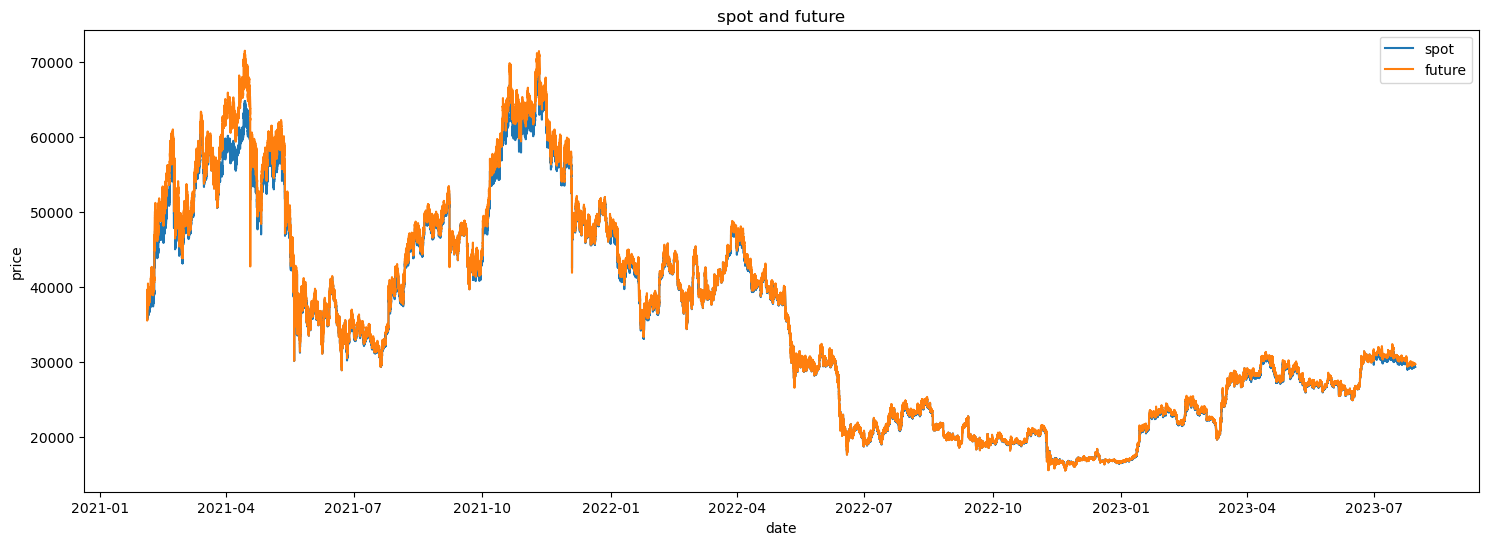

In [104]:
plt.figure(figsize=(18,6))
plt.plot(df['close time'], df['spot'], label='spot')
plt.plot(df['close time'], df['future'], label='future')
plt.legend()
plt.title('spot and future')
plt.xlabel('date')
plt.ylabel('price')
plt.show()

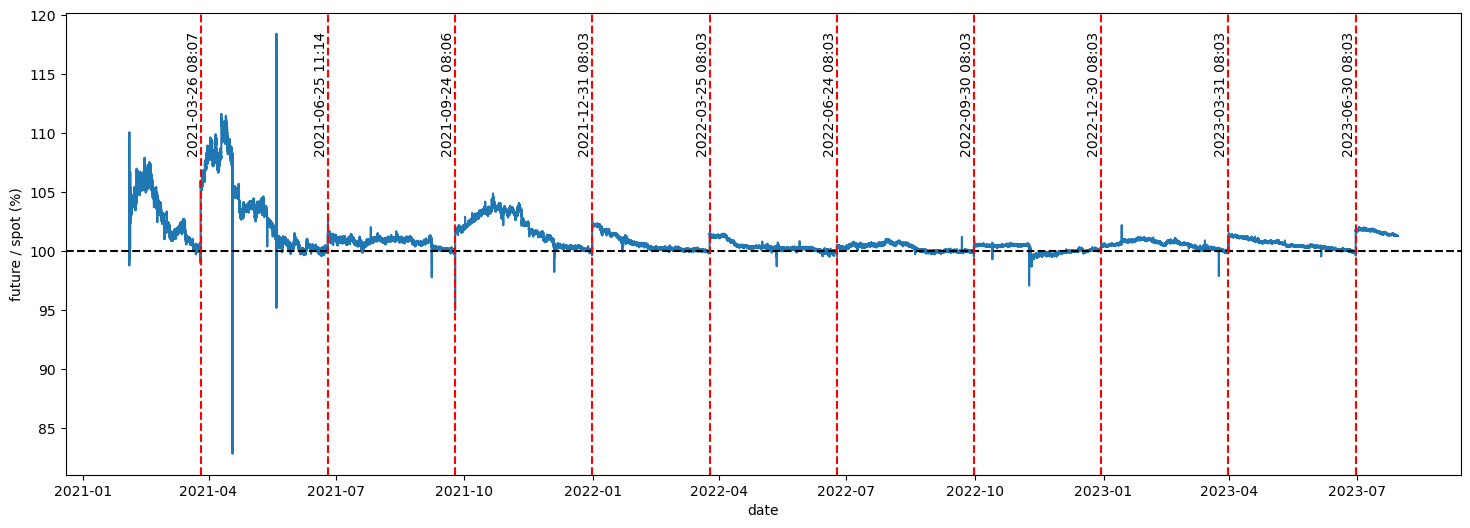

In [137]:
plt.figure(figsize=(18,6))
plt.plot(df['close time'], df['future/spot'])
plt.xlabel('date')
plt.ylabel('future / spot (%)')
plt.axhline(y=100, linestyle='--', color='black')
for maturity in maturities:
    plt.axvline(x=maturity, color='red', linestyle='--')
    plt.text(maturity, 108, maturity.strftime('%Y-%m-%d %H:%M'), rotation=90, va='bottom', ha='right')
plt.show()

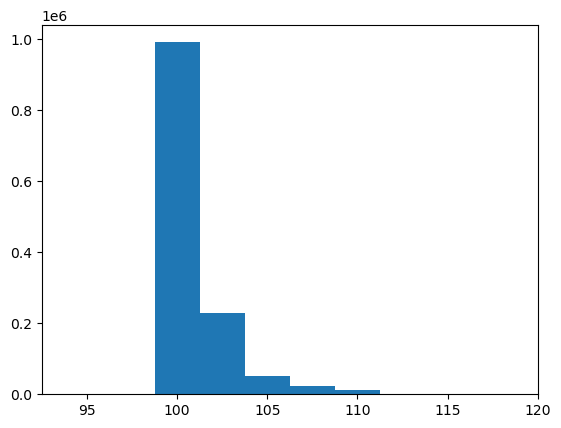

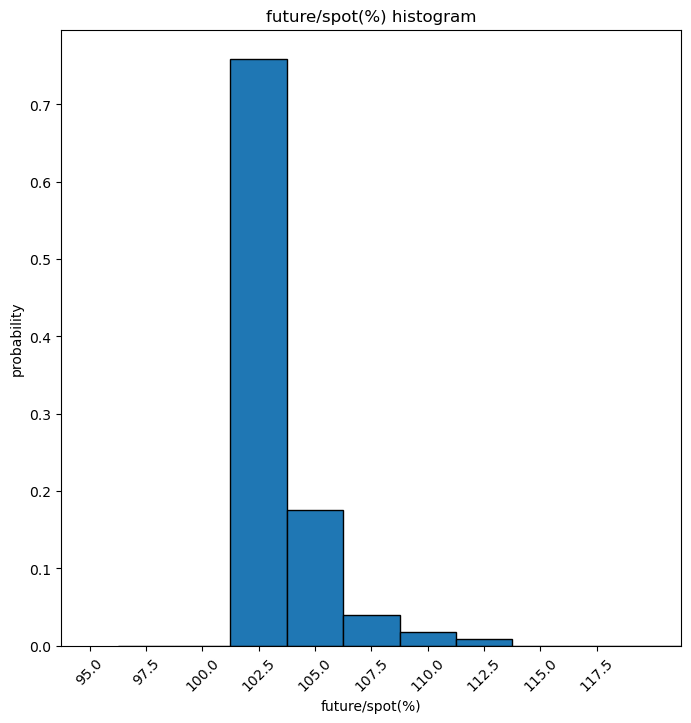

In [123]:
n, bins, _ = plt.hist(df['future/spot'], bins=np.arange(93.75, 121.25, 2.5))
normalized_density = n / np.sum(n)
plt.figure(figsize=(8,8))
plt.bar(bins[1:], normalized_density, width=2.5, align='edge', edgecolor='black')
plt.xlim([93.75, 121.25])
plt.xticks(np.arange(95, 120, 2.5), rotation=45)
plt.ylabel('probability')
plt.xlabel('future/spot(%)')
plt.title('future/spot(%) histogram')
plt.show()

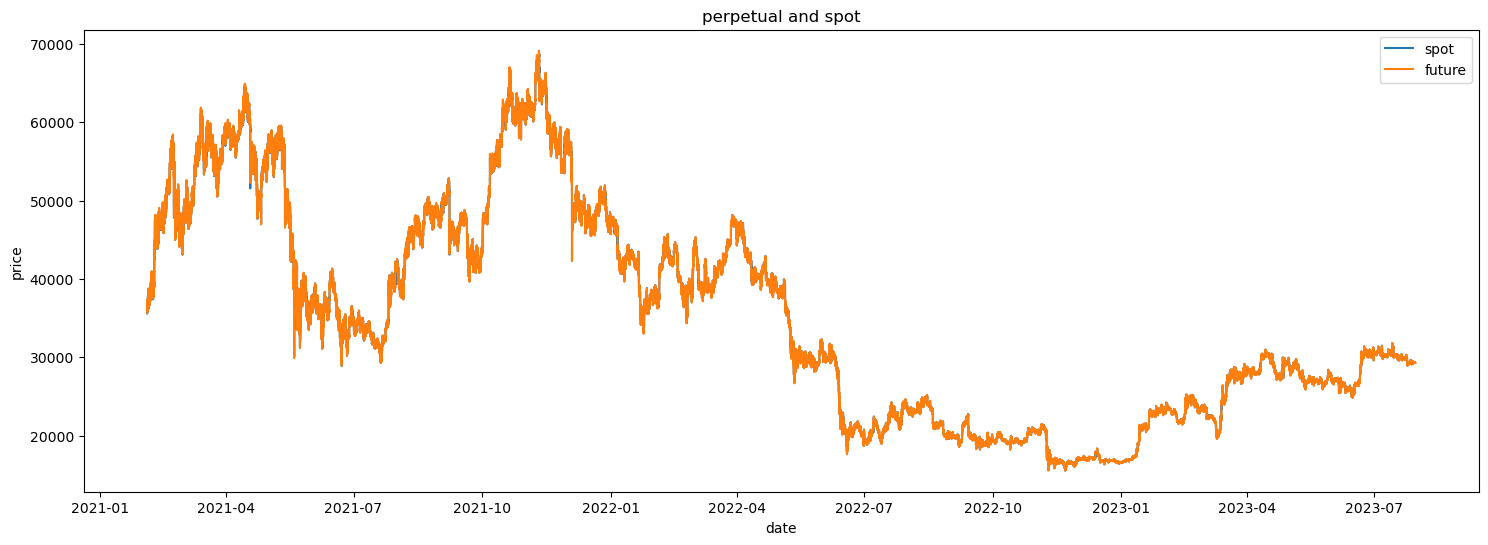

In [49]:
plt.figure(figsize=(18,6))
plt.plot(df['close time'], df['spot'], label='spot')
plt.plot(df['close time'], df['perpetual'], label='future')
plt.xlabel('date')
plt.ylabel('price')
plt.title('perpetual and spot')
plt.legend()
plt.show()

correlation between spot and perpetual price: 0.9999985631970202


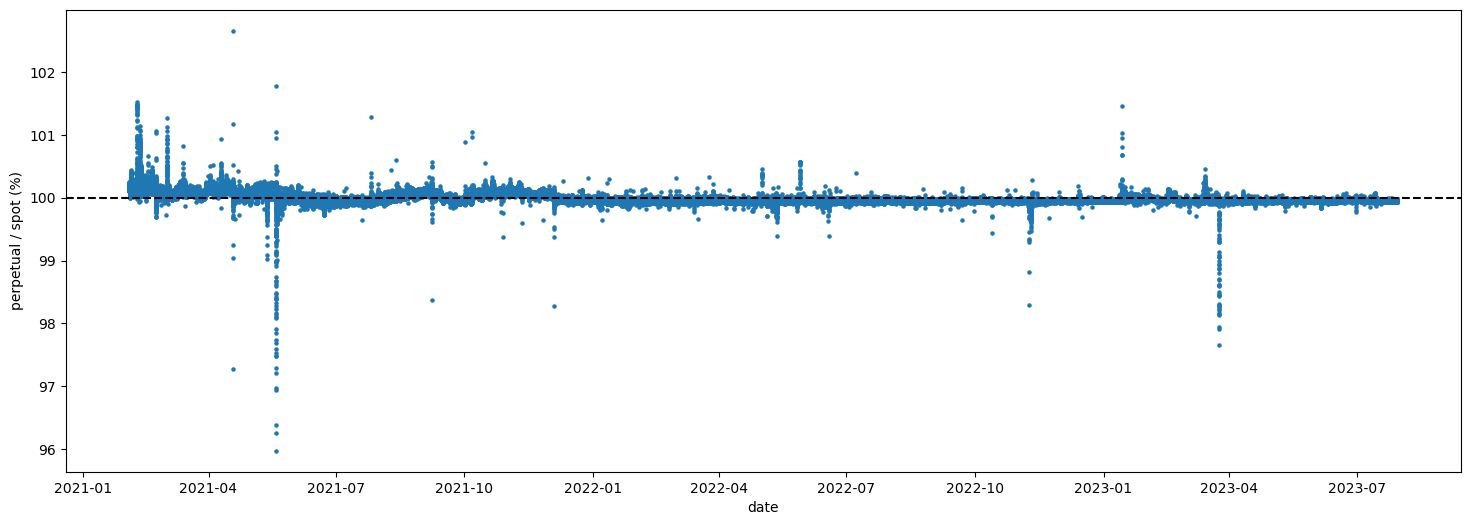

In [149]:
print('correlation between spot and perpetual price:',df['spot'].corr(df['perpetual']))
plt.figure(figsize=(18,6))
plt.scatter(df['close time'], df['perpetual/spot'], s=5)
plt.axhline(y=100, linestyle='--', color='black')
plt.xlabel('date')
plt.ylabel('perpetual / spot (%)')
plt.show()

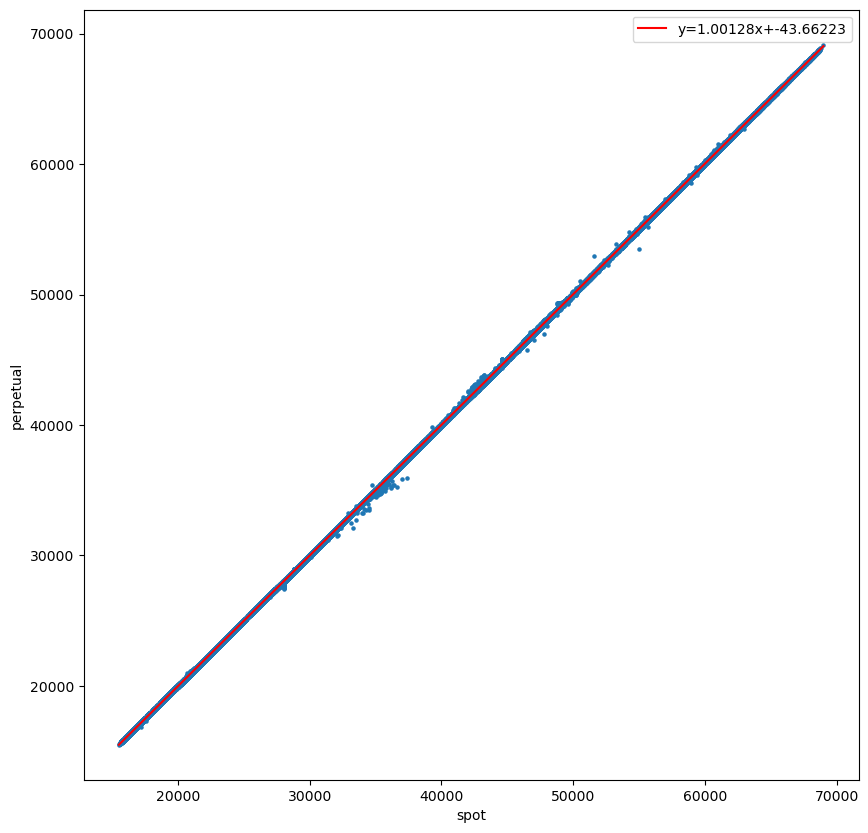

In [147]:
plt.figure(figsize=(10,10))
plt.scatter(df['spot'], df['perpetual'], s=5)
slope, intercept = np.polyfit(df['spot'], df['perpetual'], 1)
x_range = np.linspace(min(df['spot']), max(df['spot']), 100)
y_regression = slope * x_range + intercept
plt.plot(x_range, y_regression, label='y={}x+{}'.format(round(slope,5), round(intercept,5)), color='red')
plt.legend()
plt.xlabel('spot')
plt.ylabel('perpetual')
plt.show()

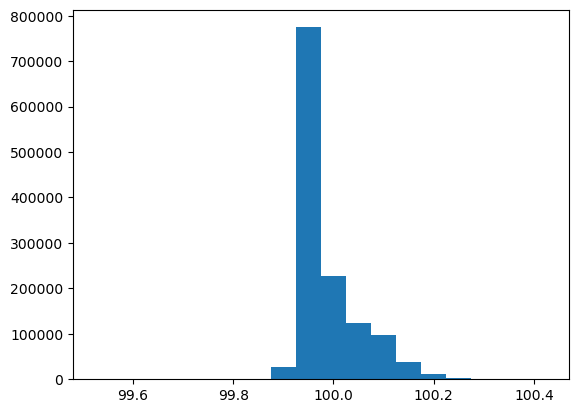

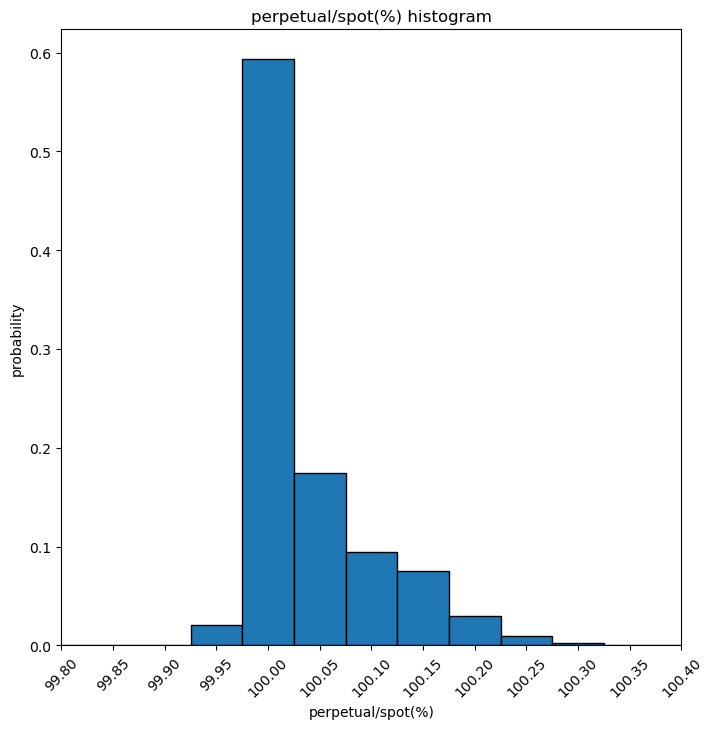

In [122]:
n, bins, _ = plt.hist(df['perpetual/spot'], bins=np.arange(99.525, 100.475, 0.05))
normalized_density = n / np.sum(n)
plt.figure(figsize=(8,8))
plt.bar(bins[1:], normalized_density, width=0.05, align='edge', edgecolor='black')
plt.xlim([99.8, 100.4])
plt.xticks(np.arange(99.8,100.4, 0.05), rotation=45)
plt.xlabel('perpetual/spot(%)')
plt.ylabel('probability')
plt.title('perpetual/spot(%) histogram')
plt.show()

In [117]:
print(df['spot'].var(), df['future'].var(), df['perpetual'].var())

181837165.06251398 199429228.70256838 182304435.0468533


In [35]:
print(spot)
perpetual

                   open time      open      high       low     close  \
0        2019-09-08 15:00:00  10401.03  10406.24  10400.00  10401.64   
1        2019-09-08 15:01:00  10401.62  10402.15  10386.19  10386.77   
2        2019-09-08 15:02:00  10387.56  10393.40  10380.11  10380.11   
3        2019-09-08 15:03:00  10383.34  10397.01  10379.98  10387.29   
4        2019-09-08 15:04:00  10386.29  10397.90  10382.14  10382.14   
...                      ...       ...       ...       ...       ...   
2043061  2023-07-30 05:31:00  29321.10  29321.11  29319.14  29319.15   
2043062  2023-07-30 05:32:00  29319.14  29319.15  29319.14  29319.15   
2043063  2023-07-30 05:33:00  29319.14  29319.15  29318.56  29318.56   
2043064  2023-07-30 05:34:00  29318.56  29318.57  29318.53  29318.53   
2043065  2023-07-30 05:35:00  29318.53  29318.54  29318.53  29318.53   

             volume              close time  quote asset volume   \
0         16.482226 2019-09-08 15:00:59.999         1.714352e+05   

,open time,open,high,low,close,volume,close time,quote asset volume,number of trades,taker buy asset volume,taker buy quote asset volume,ignore
0,2019-09-08 17:57:00,10000.0,10000.0,10000.0,10000.0,0.001,2019-09-08 17:57:59.999,10.0000,1,0.000,0.0000,0
1,2019-09-08 17:58:00,10000.0,10000.0,10000.0,10000.0,0.000,2019-09-08 17:58:59.999,0.0000,0,0.000,0.0000,0
2,2019-09-08 17:59:00,10000.0,10000.0,10000.0,10000.0,0.001,2019-09-08 17:59:59.999,10.0000,1,0.001,10.0000,0
3,2019-09-08 18:00:00,10000.0,10000.0,10000.0,10000.0,0.000,2019-09-08 18:00:59.999,0.0000,0,0.000,0.0000,0
4,2019-09-08 18:01:00,10000.0,10000.0,10000.0,10000.0,0.000,2019-09-08 18:01:59.999,0.0000,0,0.000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2045494,2023-07-30 05:32:00,29307.8,29307.8,29307.6,29307.7,13.834,2023-07-30 05:32:59.999,405441.7412,320,3.298,96656.7946,0
2045495,2023-07-30 05:33:00,29307.7,29307.7,29307.6,29307.6,4.636,2023-07-30 05:33:59.999,135870.2223,242,1.887,55303.6299,0
2045496,2023-07-30 05:34:00,29307.6,29307.7,29307.6,29307.6,6.879,2023-07-30 05:34:59.999,201607.1814,296,2.010,58908.4770,0
2045497,2023-07-30 05:35:00,29307.7,29307.7,29307.2,29307.2,18.966,2023-07-30 05:35:59.999,555847.9371,343,7.984,233992.5348,0


In [33]:
 perpetual['close']/spot['close']

0          0.961387
1          0.962763
2          0.963381
3          0.962715
4          0.963193
             ...   
2045494         NaN
2045495         NaN
2045496         NaN
2045497         NaN
2045498         NaN
Name: close, Length: 2045499, dtype: float64